In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
df = pd.read_csv('input_data.csv', sep=';')
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [3]:
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          int64  
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.3+ GB
None


In [4]:
print(df.head())

         date     price  level  levels  rooms  area  kitchen_area    geo_lat  \
0  2021-01-01   2451300     15      31      1  30.3           0.0  56.780112   
1  2021-01-01   1450000      5       5      1  33.0           6.0  44.608154   
2  2021-01-01  10700000      4      13      3  85.0          12.0  55.540060   
3  2021-01-01   3100000      3       5      3  82.0           9.0  44.608154   
4  2021-01-01   2500000      2       3      1  30.0           9.0  44.738685   

     geo_lon  building_type  object_type  postal_code  street_id  id_region  \
0  60.699355              0            2     620000.0        NaN         66   
1  40.138381              0            0     385000.0        NaN          1   
2  37.725112              3            0     142701.0   242543.0         50   
3  40.138381              0            0     385000.0        NaN          1   
4  37.713668              3            2     353960.0   439378.0         23   

    house_id  
0  1632918.0  
1        NaN  

In [5]:
print(df.isnull().sum())


date                   0
price                  0
level                  0
levels                 0
rooms                  0
area                   0
kitchen_area           0
geo_lat                0
geo_lon                0
building_type          0
object_type            0
postal_code       507771
street_id        4205554
id_region              0
house_id         3261943
dtype: int64


In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
columns_to_drop = ['house_id', 'street_id', 'date', 'postal_code', 'geo_lon', 'geo_lat'] 
df = df.drop(columns=columns_to_drop)


In [9]:

df = df.rename(columns={
    'level': 'floor',
    'levels': 'total_floors',
})
df.head()


,price,floor,total_floors,rooms,area,kitchen_area,building_type,object_type,id_region
0,2451300,15,31,1,30.3,0.0,0,2,66
1,1450000,5,5,1,33.0,6.0,0,0,1
2,10700000,4,13,3,85.0,12.0,3,0,50
3,3100000,3,5,3,82.0,9.0,0,0,1
4,2500000,2,3,1,30.0,9.0,3,2,23


In [10]:
from scipy import stats
z_scores = stats.zscore(df['price'])
threshold = 3
df_cleaned = df[abs(z_scores) <= threshold]
print("Number of rows before removing negative values in the columns:", len(df))

Number of rows before removing negative values in the columns: 10961465


In [12]:
df_cleaned = df[(df['price'] > 0) & 
                (df['floor'] > 0) & 
                (df['total_floors'] > 0) & 
                (df['rooms'] > 0) & 
                (df['area'] > 0) & 
                (df['kitchen_area'] > 0) & 
                (df['building_type'] > 0) & 
                (df['object_type'] > 0) & 
                (df['id_region'] > 0)]

print("Number of rows after removing negative values in the columns:", len(df_cleaned))


Number of rows after removing negative values in the columns: 365392


In [13]:
df_cleaned = df_cleaned.head(2000)


### Feature selection

In [14]:
df_cleaned.columns

Index(['price', 'floor', 'total_floors', 'rooms', 'area', 'kitchen_area',
       'building_type', 'object_type', 'id_region'],
      dtype='object')

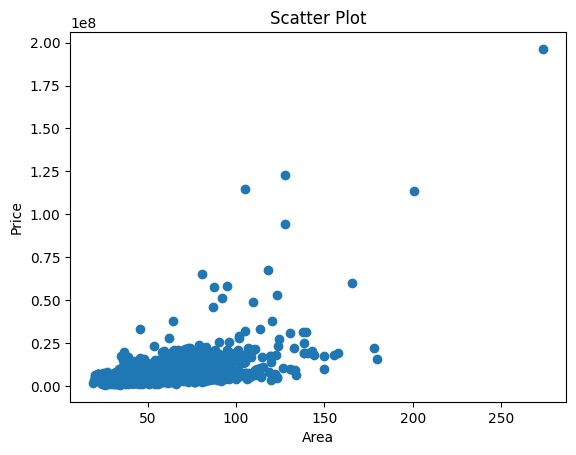

In [15]:

plt.scatter(df_cleaned['area'], df_cleaned['price'])
plt.title("Scatter Plot")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

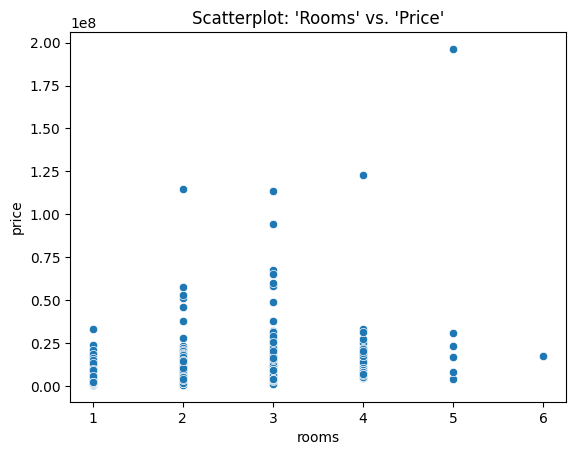

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='rooms', y='price', data=df_cleaned)
plt.title("Scatterplot: 'Rooms' vs. 'Price'")
plt.show()


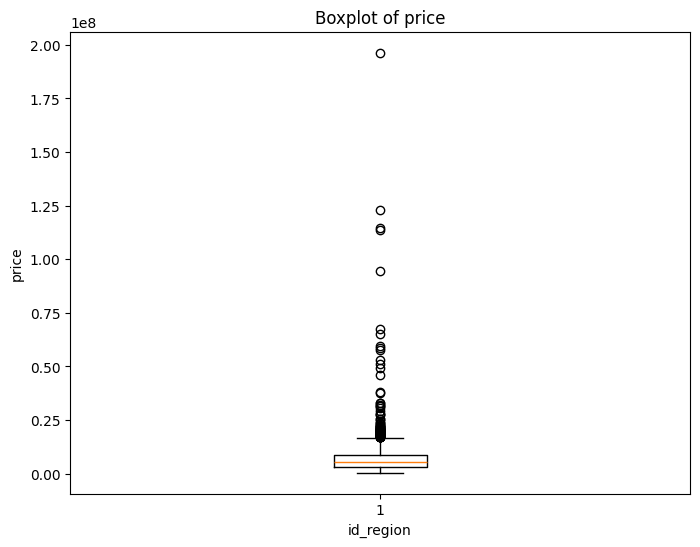

In [14]:
import matplotlib.pyplot as plt

# BoxPlot of the price in regard to id_region
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['price'])
plt.title('Boxplot of price')
plt.xlabel('id_region')
plt.ylabel('price')
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df_cleaned['id_region_squared'] = df_cleaned['id_region'] ** 2
df_cleaned['total_floors_squared'] = df_cleaned['total_floors'] ** 2
df_cleaned['kitchen_area_squared'] = df_cleaned['kitchen_area'] ** 2

X = df_cleaned[['id_region', 'total_floors_squared', 'kitchen_area']]
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Linear Regression:")
print("R²:", r2_lr)
print("MSE:", mse_lr)
print("")

print("Random Forest Regressor:")
print("R²:", r2_rf)
print("MSE:", mse_rf)


Linear Regression:
R²: 0.187922802977873
MSE: 109091205461719.62

Random Forest Regressor:
R²: 0.6106941486424453
MSE: 52297792344906.2


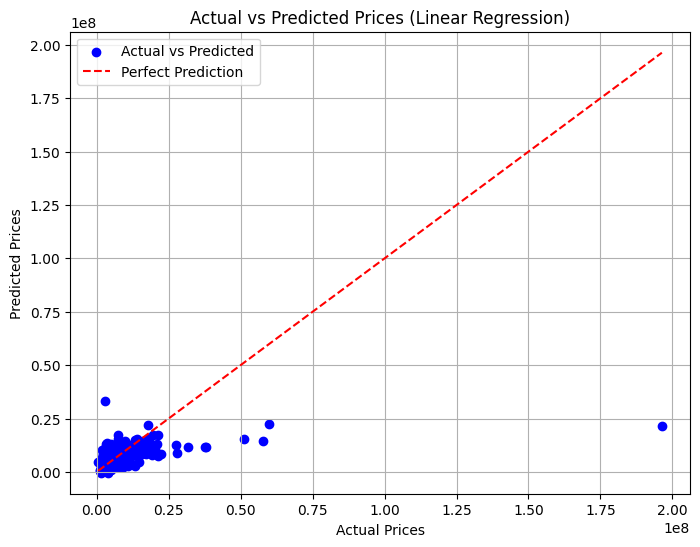

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


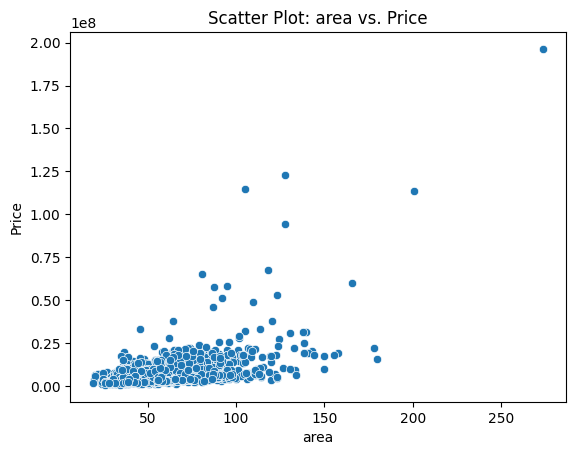

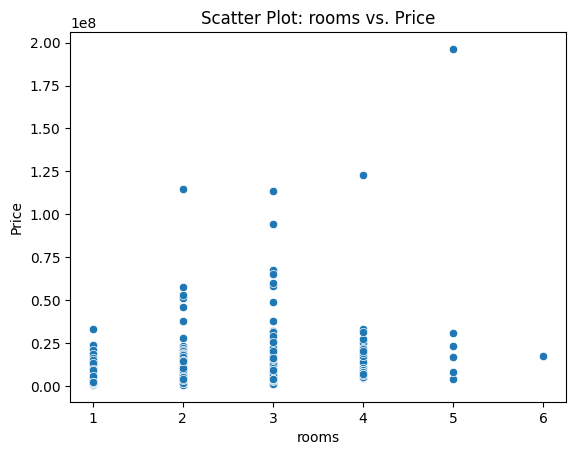

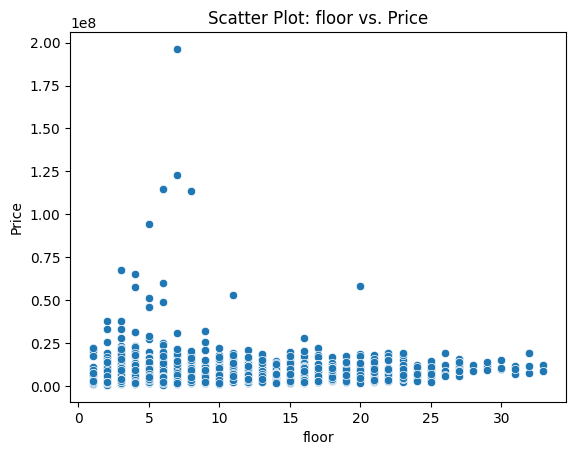

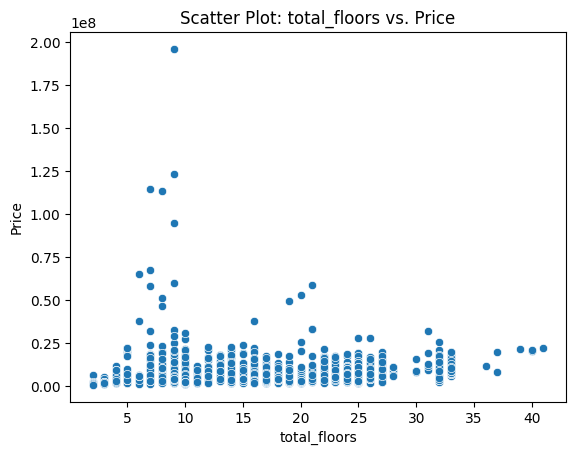

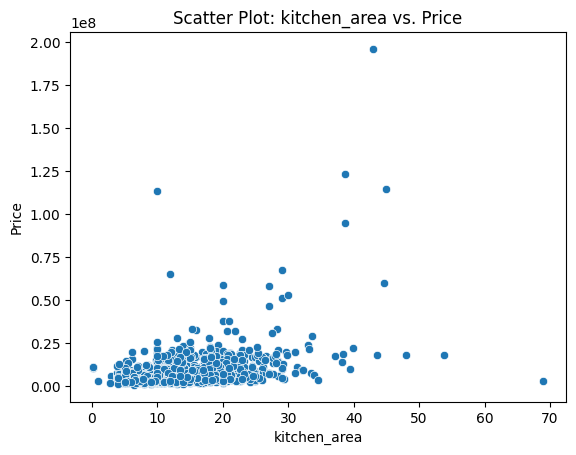

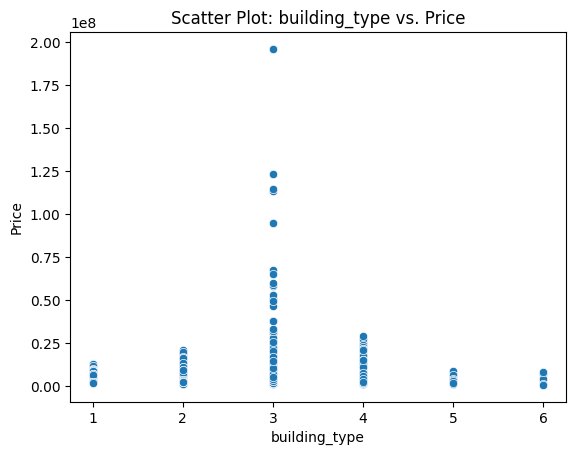

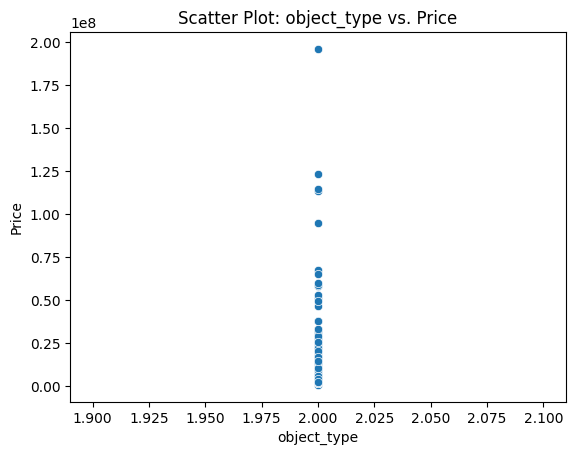

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['area', 'rooms', 'floor', 'total_floors', 'kitchen_area', 'building_type', 'object_type']
for feature in features:
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['price'])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Scatter Plot: {feature} vs. Price")
    plt.show()


In [20]:
df_cleaned

,price,floor,total_floors,rooms,area,kitchen_area,building_type,object_type,id_region,id_region_squared,total_floors_squared,kitchen_area_squared
4,2500000,2,3,1,30.00,9.00,3,2,23,529,9,81.0000
15,8865000,10,13,2,66.70,14.60,4,2,78,6084,169,213.1600
28,3650000,6,7,1,36.00,16.00,4,2,72,5184,49,256.0000
33,2250000,2,3,1,40.00,10.20,4,2,40,1600,9,104.0400
34,4296056,2,17,1,36.99,11.72,4,2,50,2500,289,137.3584
...,...,...,...,...,...,...,...,...,...,...,...,...
25177,2500000,2,7,1,42.20,9.60,4,2,19,361,49,92.1600
25200,14208060,7,22,2,55.10,13.00,3,2,77,5929,484,169.0000
25222,32830000,3,21,1,45.80,15.30,3,2,77,5929,441,234.0900
25225,4105250,13,13,2,39.70,7.82,4,2,72,5184,169,61.1524


Gradient Boosting Regressor:

In [21]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_

y_pred = best_gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 36672252803675.81
R^2 Score: 0.7270109892062196


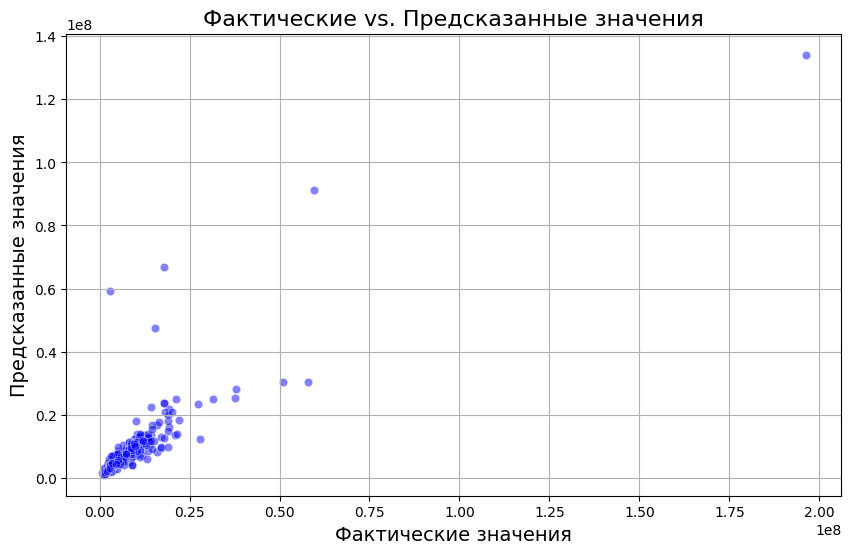

C:\Users\Админ\AppData\Local\Temp\ipykernel_24080\285976474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


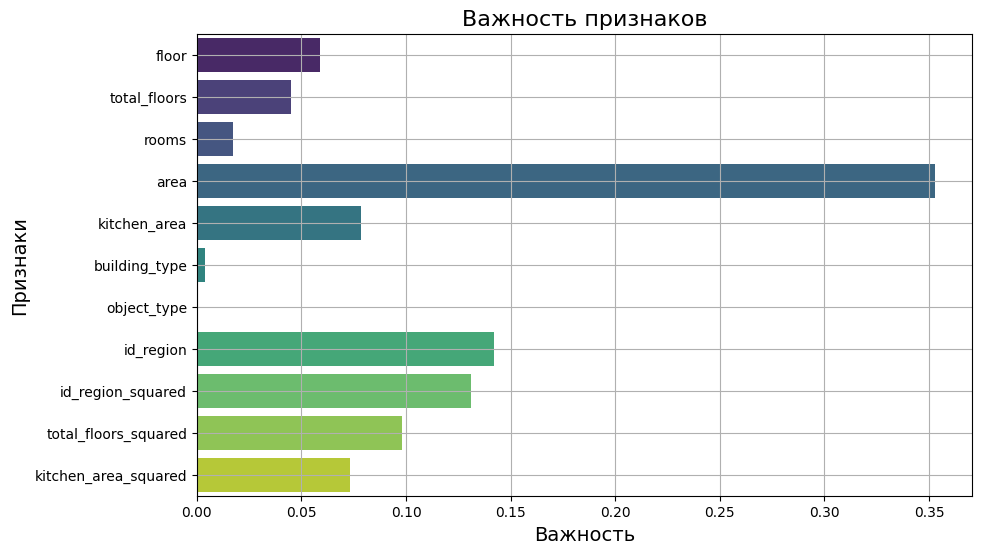

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.title('Фактические vs. Предсказанные значения', fontsize=16)
plt.xlabel('Фактические значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.grid(True)
plt.show()

feature_importance = best_gbr.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title('Важность признаков', fontsize=16)
plt.xlabel('Важность', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.grid(True)
plt.show()


добавил ареа в расширенный набор признаков 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']
X['area_log'] = np.log(X['area'])  
X['price_per_area'] = y / X['area'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 18405971835995.15
R^2 Score: 0.8629855637420001


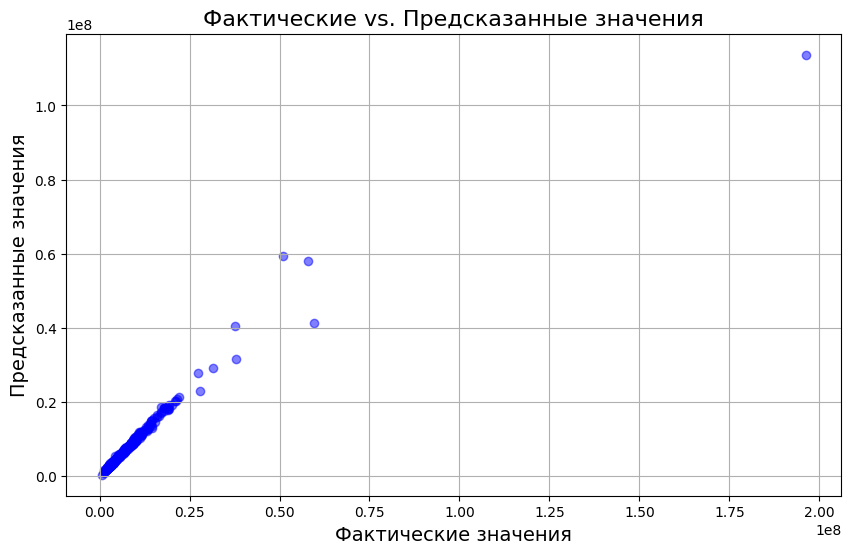

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title('Фактические vs. Предсказанные значения', fontsize=16)
plt.xlabel('Фактические значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)

plt.grid(True)

plt.show()


добавил китчен ареа в расширенный набор признаков 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X['area_log'] = np.log(X['area'])  
X['kitchen_area_log'] = np.log(X['kitchen_area']) 
X['price_per_area'] = y / X['area']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 18991160774122.83
R^2 Score: 0.8586294051443225


 используется метод случайного поиска гиперпараметров для модели градиентного бустинга.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')

random_search.fit(X_train, y_train)

best_gbr = random_search.best_estimator_

y_pred = best_gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 48912268270436.61
R^2 Score: 0.6358960601000186


гиперпараметров модели с использованием случайного поиска (RandomizedSearchCV).

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gbr = GradientBoostingRegressor(random_state=42)


param_dist = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}


random_search = RandomizedSearchCV(
    estimator=gbr, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    n_jobs=-1, 
    random_state=42,
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train, y_train)

best_gbr = random_search.best_estimator_

y_pred = best_gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 47673742074364.59
R^2 Score: 0.6451156748021183


XGBoost

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgbr = xgb.XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgbr, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    n_jobs=-1, 
    random_state=42,
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train, y_train)

best_xgbr = random_search.best_estimator_


y_pred = best_xgbr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 34413288351460.434
R^2 Score: 0.74382676746042


In [32]:
df_cleaned.to_csv('dataset.csv', index=False)
